# Data Analyst Professional Practical Exam Submission

## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Validation and Cleaning

Initial view of dataset

In [5]:
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [6]:
# create a copy of the dataset
sales = df.copy()

In [7]:
# general info about the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [8]:
# shape of our dataset
sales.shape

(15000, 8)

In [9]:
# check to see if any duplicates are found
sales.duplicated().sum()

0

Checking for null values in the columns

In [10]:
# check for null values amd 1074 are found in revenue column
sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

Replaced null values in revenue column with the mean revenue

In [11]:
#replace null values in revenue column with the mean revenue
mean_revenue = round(sales["revenue"].mean(),2)

sales["revenue"] = sales["revenue"].fillna(mean_revenue)
null_values = sales[sales["revenue"].isnull()]

#validate there is no nulls
sales.isna().sum()


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

Checking to see the unique values of sales_method as they should only be 3

In [12]:
# unique values of sales method
sales["sales_method"].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

Replacing similar values into the initial 3 methods only

In [13]:
# replacing typos to have only 3 methods
sales["sales_method"].replace({'em + call':'Email + Call','email':'Email'},inplace = True)
sales["sales_method"].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

checking the years as customers colunmn for any values greater than 40 as the company was founded in 1984

In [14]:
# company founded in 1984 
sales["years_as_customer"].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

In [15]:
# company was founded 40 years ago so impossible to be customer more than 40 years
sales = sales[sales["years_as_customer"]<=40]

Removed customers that had more than 40 years in the column

In [16]:
#check that columns are removed
sales["years_as_customer"].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
Name: years_as_customer, dtype: int64

checking to see if there are any typos in the state column

In [17]:
# check if there is typos in states
sales["state"].value_counts(ascending = False)

California        1870
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [19]:
# validate the number of unique customer ids
sales["customer_id"].nunique()

14998

In [20]:
# final shape of dataset after cleaning
sales.shape

(14998, 8)

# Exploratory Data Analysis


In [22]:
# count of customers for each approach
customer_count = sales.groupby("sales_method")["customer_id"].count().sort_values(ascending = False)

sales_method
Email           7465
Call            4961
Email + Call    2572
Name: customer_id, dtype: int64

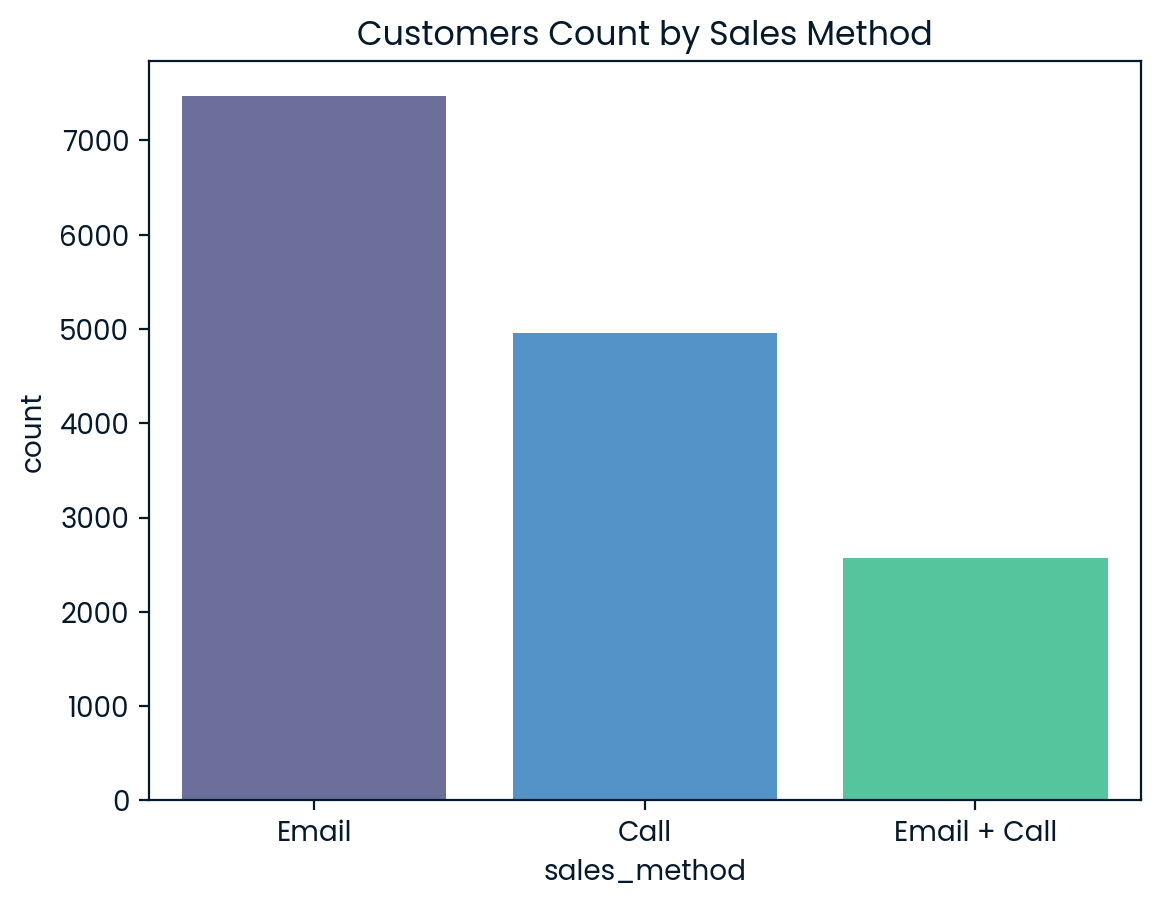

In [23]:
display(customer_count)
order = customer_count.index
sns.countplot(data = sales,x = "sales_method",hue = "sales_method",order = order)
plt.title("Customers Count by Sales Method")
plt.show()

Most customers were contacted through the Email method followed by the call method, then Lastly the Email + Call method which might lead to bias as to what sales method generated more revenue

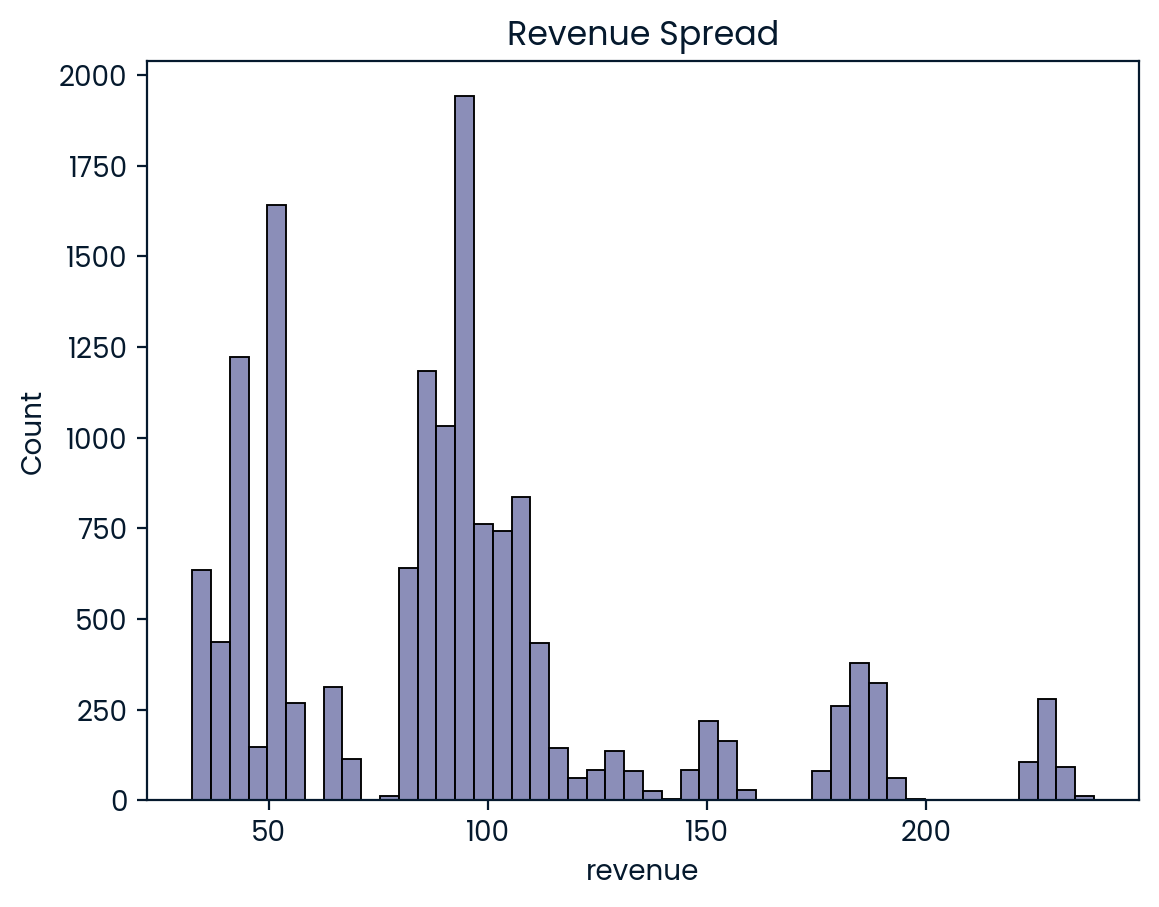

In [24]:
# spread of revenue
sns.histplot(data = sales, x= "revenue")
plt.title("Revenue Spread")
plt.show()

The revenue spread indicates the price range that resulted in the highest sales volume. The peak was observed around the price range of 95-100, with the 55-60 range closely following.

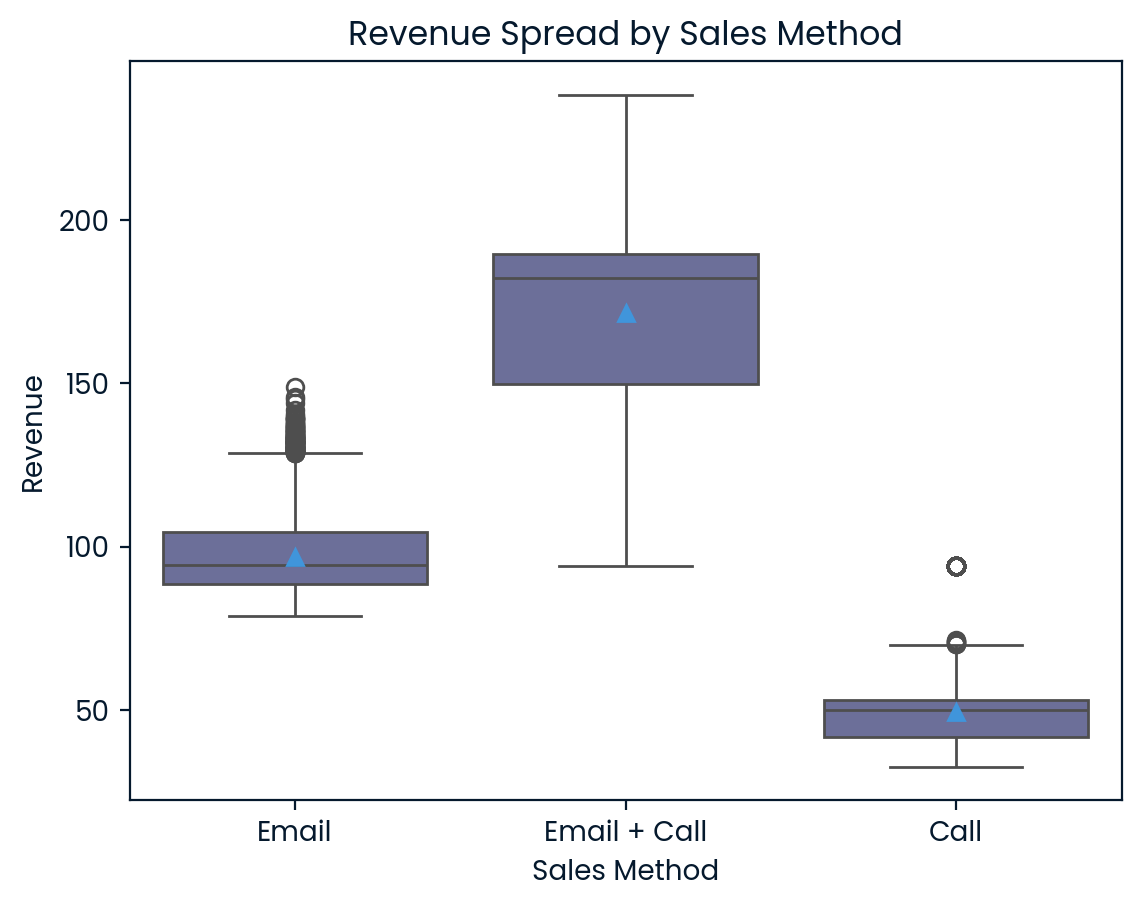

In [33]:
# revenue spread for each sales_method
sns.boxplot(data = sales, x = "sales_method",y="revenue",showmeans=True)
plt.title("Revenue Spread by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.show()

The Email + Call method generated the highest average revenue and also exhibited the greatest spread, as indicated by the length of the whiskers. This is followed by the Email method, and lastly, the Call method

In [25]:
# calculate total sales by each method through grouping 
sales_by_method = sales.groupby("sales_method",as_index=False)["revenue"].sum().sort_values(by = "revenue",ascending = False)


,sales_method,revenue
1,Email,723318.53
2,Email + Call,441038.26
0,Call,244514.35


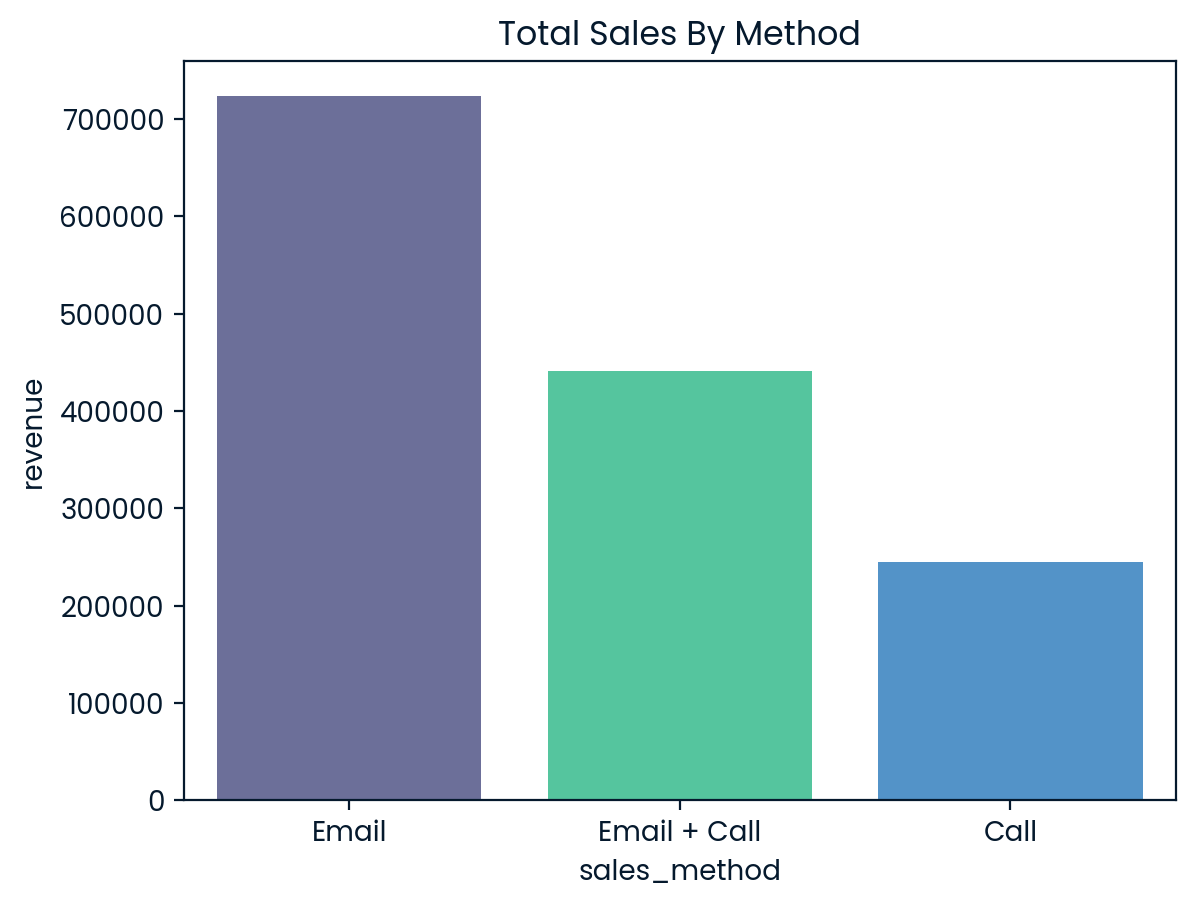

In [26]:
# plotting sales by method
display(sales_by_method)
sns.barplot(x="sales_method",y="revenue", data = sales_by_method, ci = None, hue = "sales_method")
plt.title("Total Sales By Method")
plt.show()

The email method generated the highest total revenue, amounting to $723,318.53. However, this isn't a reliable indicator of effectiveness, as the email method also had the highest number of customers, making it unsurprising that it led to the highest revenue


In [34]:
# calculate weekly sales
sales_week = sales.groupby(["sales_method","week"])["revenue"].sum()

sales_method  week
Call          1        27849.92
              2        36609.92
              3        39440.89
              4        53394.65
              5        56993.52
              6        30225.45
Email         1       247518.32
              2       148032.72
              3       106776.19
              4       115772.42
              5        80009.25
              6        25209.63
Email + Call  1        18482.14
              2        29100.20
              3        52024.69
              4        84119.86
              5       137235.95
              6       120075.42
Name: revenue, dtype: float64

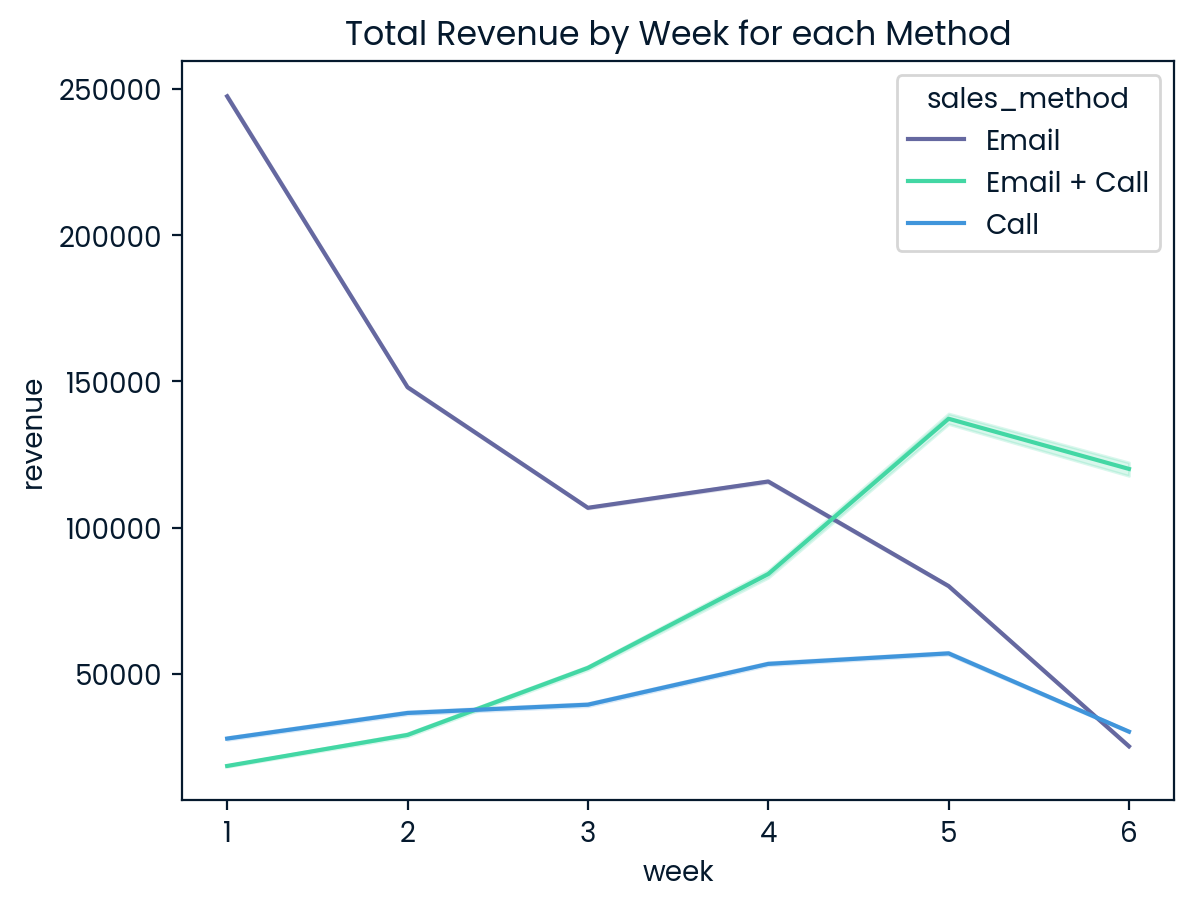

In [28]:
#revenue over time for each method
display(sales_week)
sns.lineplot(data = sales, x= "week",y="revenue",hue="sales_method",estimator="sum")
plt.title("Total Revenue by Week for each Method")
plt.show()

Since the launch of the new office stationery line, the email method initially generated the highest revenue. However, it experienced a continuous decline over time. Between weeks 4 and 5, the Email + Call method, which had been steadily increasing, surpassed email as the top revenue generator. After week 5, the Email + Call method also saw a steady decline in revenue.

# Metric

A key metric for the business to monitor and compare each sales method should be the average revenue per week. This approach is beneficial for two reasons:
<ol>
<li>Bias Correction: Total revenue can be skewed by the sales method with the highest number of customers, as methods are not evenly distributed. By using average revenue per week, we gain a clearer indication of which sales method is truly the most successful, independent of customer volume.</li>

<li>Behavioral Insights: Analyzing revenue on a weekly basis allows the company to observe changes in customer behavior following key actions in each sales method. For instance, with the Email + Call method, you can track revenue impacts after an initial email is sent and a follow-up call is made by the sales team a week later</li>

sales_method  week
Call          1        36.741319
              2        45.478161
              3        43.726042
              4        53.181922
              5        54.591494
              6        67.467522
Email         1        87.928355
              2        99.685333
              3        92.848861
              4       107.695274
              5       107.684051
              6       127.967665
Email + Call  1       124.879324
              2       145.501000
              3       144.915571
              4       169.939111
              5       174.378590
              6       205.961269
Name: revenue, dtype: float64

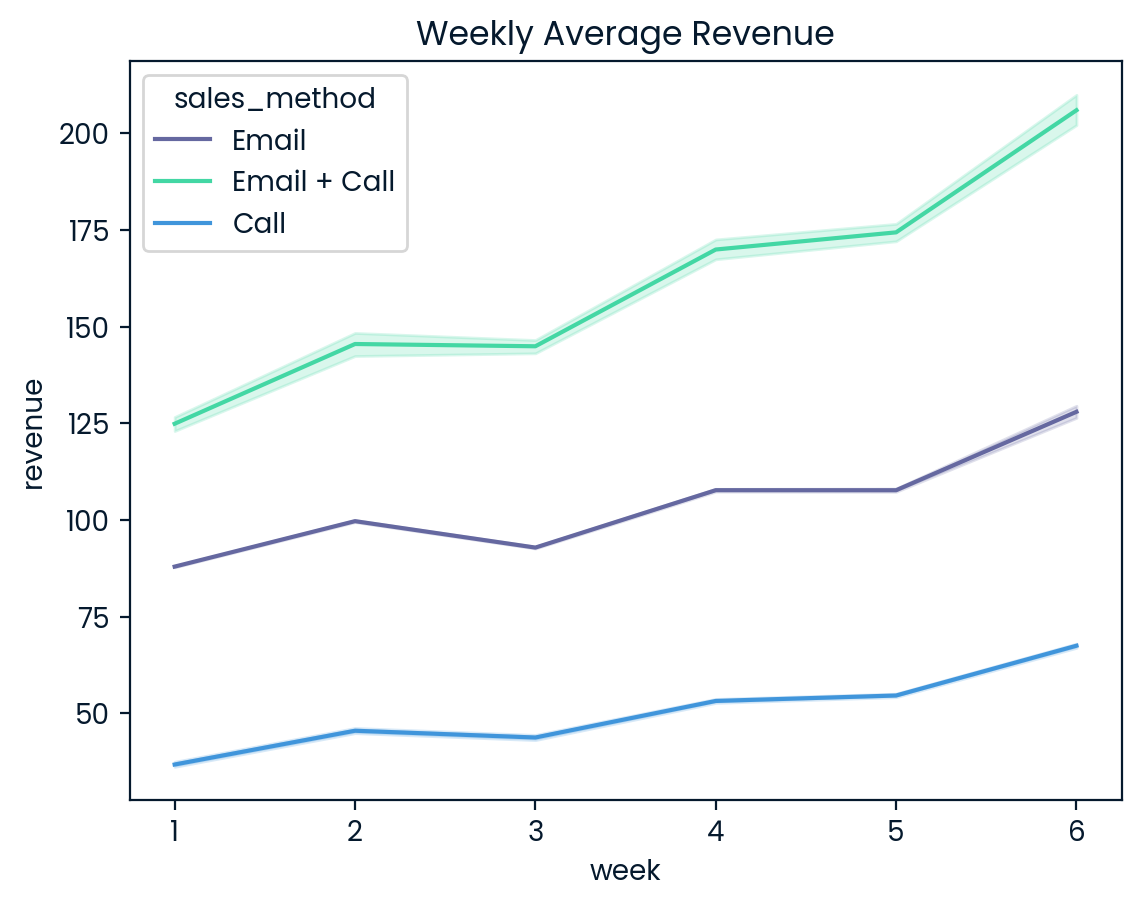

In [45]:
display(sales.groupby(["sales_method","week"])["revenue"].mean())
sns.lineplot(data = sales,x="week",y="revenue",estimator=np.mean,hue = "sales_method")
plt.title("Weekly Average Revenue")
plt.show()

after viewing our metric we can now deduce accordingly that the most successful sales method was the Email + Call method with a general increase in average revenue after each week

# Recommendations

<ul>
    <li>Pens and Printers should use the average revenue per week metric to evaluate the performance of each sales method after each campaign. This will provide a clearer picture of the effectiveness of each approach.</li><br>
    <li>They should prioritize the Call + Email method, as it has demonstrated higher average revenue compared to other methods. Allocating more resources and focus to this method could potentially enhance overall revenue performance.</li><br>
    <li>The Calls Only method should be discontinued, as it has consistently performed poorly and ranked lowest across all metrics. Its resources should be reallocated to the Email and Call + Email methods, which have shown better results.</li><br>
    <li>Increasing the frequency of reminders sent to customers could positively impact revenue. Pens and Printers should experiment with more frequent reminders and analyze the effect on weekly revenue trends to determine if this strategy leads to improved outcomes.</li><br>
    <li>Analyze Customer Feedback: Along with adjusting sales methods and communication strategies, Pens and Printers should gather and analyze customer feedback to understand their preferences and pain points. This can provide insights into why certain methods are more successful and guide further refinements in their approach.</li>
</ul>